<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4> 

# Project Phase 1:Simulation

STUDENT NAMES: Arman Lotfalikhani , Sepehr Kazemi Ranjbar

STUDENT IDs: 99109166, 99106599

# Simulation Question 1

Please note that in the first cell we have used a reset command to avoid some data storing issues, so rerunning this cell after running the next cells will cause problems.
Knowing the header names of the file, we have converted the pandas dataset to a numpy array. We have (correctly, in our case) assumed that 3 is a divisor of n, (for using n1/3).

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


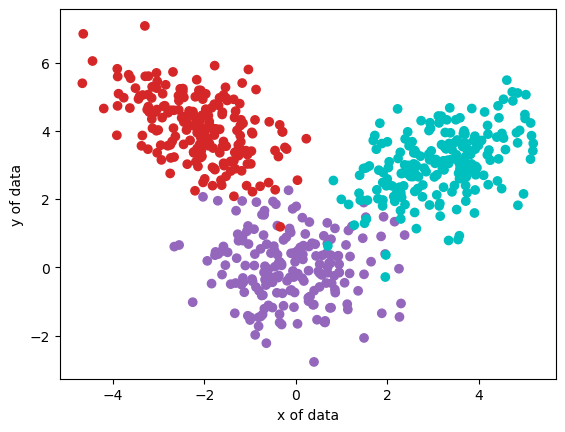

In [416]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy.random import default_rng
import pandas as pd

dataset1=pd.read_csv('image1.csv')
x1=np.transpose(dataset1[['0','1']].to_numpy())
n1=x1.shape[1]
plt.scatter(x1[0],x1[1],c=np.repeat(['#9467bd','c','#d62728'],n1/3))
plt.xlabel('x of data')
plt.ylabel('y of data')
plt.show()

Results: We see that the dataset can visibly be partitioned into 3 categories.

For image 2:
The code is the same as the previous one. We have only changed variable names.

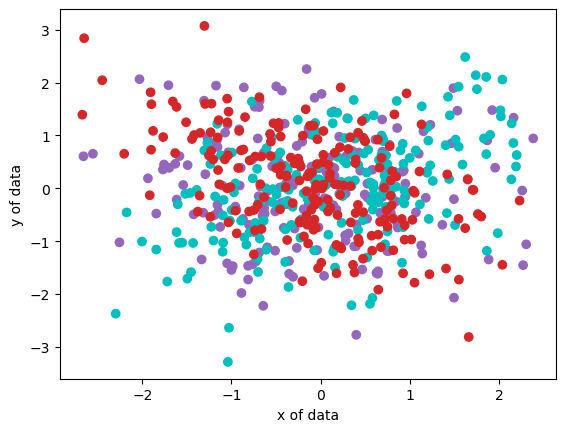

In [417]:
dataset2=pd.read_csv('image2.csv')
x2=np.transpose(dataset2[['0','1']].to_numpy())
n2=x2.shape[1]
plt.scatter(x2[0],x2[1],c=np.repeat(['#9467bd','c','#d62728'],n2/3))
plt.xlabel('x of data')
plt.ylabel('y of data')
plt.show()

We observe that the three distributions cannot be told apart.

# Simulation Question 2

**GMM_initializer and Farthest_point_method:**<br>
<p>The GMM_initializer gives initial parameters of the mixed distributions. 'method' is an integer number used for changing the initialization method for mu_0, as explained in Theory Question 4, part 1 (initialization)<p>

<p>The next function implements the Farthest Point Method of initializing the centers. First, a copy of the dataset is produced as we have to omit points from it in the process. Then, a random point is chosen and removed from the dataset. This point is chosen as the first center. Then, from the remaining points, we choose the farthest from the first center (i.e. having the most distance)<p>
For the third and other points, first we compute the minimum of the distance between each point and the chosen centers. Then we choose the point with the maximum number. This ensures that we do not find a point close to one center, but far from other centers. At the end of the iteration, The chosen point is removed. If we do not do so, a zero minimum distance will appear and all K points will be equal, which means the K distributions are initialized equally (that is obviously bad).
Note that in the version proposed by Murphy, we associate higher probability for points with larger minimum distance, but we choose the point with the most distance and do not randomize the next point again. 

Another method, Proposed by Murphy, is we simply choose K samples from the dataset and set them as the cluster centers. This is the defualt method in our function.

Also, another valid method is to assume we have prior information about the distibutions. This is only activated when 'method=2'.

**GM_estep function:**
The Q matrix contains q_kn (conditional) probabilities that have to be computed in this step. The gaussian distribution formula is used in computing each entry. Also, after subtracting mu_k from the dataset x in each iteration, we notice that the diagonal entires of (X_p^T (Sigma_k^(-1)) X_P) give x_p_i ^T (Sigma_k^(-1)) x_p_i. So we have used matrix multplication and np.diag to compute each row at once and avoid using more iterations.<br>
Then, for constructing the R matrix, we get the argmax of each column of Q, (variable 'indices') and use it to construct R. In the end, Q,R,indices are returned as the 'indices' variable is easier to work with later.

In [418]:
def GMM_initializer(x,K,method,given_mu):
    n=x.shape[1]
    d=x.shape[0]
    rng=default_rng(70)
    pi=1/K*np.ones([K])
    indices=rng.choice(n,size=K)
    mu=np.transpose(x[:,indices])
    if (method==1):
        mu=Farthest_point_method(x,K)
    elif (method==2):
        mu=given_mu
    sigmas=[]
    for i in range(K):
        sigma_i=np.identity(d)
        sigmas.append(sigma_i)
    return pi,mu,np.array(sigmas)
def Farthest_point_method(y,K):
    x=np.copy(y)
    n=x.shape[1]
    d=x.shape[0]
    rng=default_rng(100)
    rand=rng.integers(0,n)
    mu=np.zeros([K,d])
    mu[0]=x[:,rand]
    x=np.delete(x,rand,axis=1)
    for i in range(1,K):
        dist_array=np.zeros([i,x.shape[1]])
        for j in range(i):
            x_tilde=x-np.reshape(np.repeat(mu[j],x.shape[1],axis=0),x.shape)
            dist_array[j]=np.linalg.norm(x_tilde,axis=0)
        dist2=np.amin(dist_array,axis=0)
        index=np.argmax(dist2)
        mu[i]=x[:,index]
        x=np.delete(x,index,axis=1)
    return mu
    
def GMM_e_step(x,K,mu_t,sigma_t,pi_t):
    n=x.shape[1]
    d=x.shape[0]
    Q=np.zeros([K,n])
    R=np.zeros([K,n])
    const=np.sqrt(np.power((2*np.pi),d))
    for k in range(K):
        det=np.linalg.det(sigma_t[k])
        a=np.sqrt(const*np.abs(det))
        x_tilde_k=x-np.reshape(np.repeat(mu_t[k],x.shape[1],axis=0),x.shape)
        Q[k]=(pi_t[k]/const)*np.exp(-1/2*np.diag(np.transpose(x_tilde_k)@np.linalg.inv(sigma_t[k])@x_tilde_k))
    W=np.sum(Q,axis=0)
    Q=Q/W
    indices=np.argmax(Q,axis=0,keepdims=False)
    for j in range(n):
        R[indices[j]][j]=1
    return Q,R,indices

K=3
pi1,mu1,sigmas1=GMM_initializer(x1,K,1,None)
Q1,R1,ind1=GMM_e_step(x1,K,mu1,sigmas1,pi1)
print(Q1)
print(R1)

[[5.00545885e-04 1.69468809e-01 9.89286735e-01 ... 9.99999679e-01
  1.00000000e+00 9.99999572e-01]
 [3.42600092e-06 6.63413524e-07 2.23263870e-05 ... 1.32361900e-12
  3.34358189e-15 8.32489683e-11]
 [9.99496028e-01 8.30530527e-01 1.06909387e-02 ... 3.20885696e-07
  1.15331739e-17 4.27697756e-07]]
[[0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]


We have used the farthest point method for initialization in this question. as we can see from R and Q entries, The basic clustering and the original dataset clusters are almost identical, but there are a few errors (column 3 of R) as we can see. This shows that the farthest point method is good for initializaion

For image 2, the code is identical and we have only changed variable indices

In [419]:
K=3
pi2,mu2,sigmas2=GMM_initializer(x2,K,1,None)
Q2,R2,ind2=GMM_e_step(x2,K,mu2,sigmas2,pi2)
print(Q2)
print(R2)

[[9.65100977e-01 9.62091427e-01 4.79638596e-01 ... 9.99931953e-01
  2.68943079e-01 9.99749858e-01]
 [2.44050252e-05 2.70748370e-03 1.94438664e-02 ... 3.53733765e-06
  6.38514886e-01 1.19304704e-06]
 [3.48746177e-02 3.52010897e-02 5.00917537e-01 ... 6.45096361e-05
  9.25420358e-02 2.48949276e-04]]
[[1. 1. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


As we can see, in this case, too, the farthest point method yields good results. We still have few classification errors.

# Simulation Question 3

**GMM_mstep:** <p> We implement the formulas is Theory Question 4. First, we sum over rows of Qn (variable 'denom'). We multiply it in 1/N to get the pi_k. We also need this array as the denominator of expressions for mu_k and sigma_k <p>
<p>We can also simplify the calculation of different mu_k with considering the numerator sum as a matrix multiplication. Then we use division of martix bu array to get to correct mu matrix.<p>
<p> For sigma_k, according to the simplified formula in Theory Question 4, we need mu^(t+1) and a weighted sum over x_i x_i^T, which we have implemented using a loop.<p>
<p> In this simulation, we have used results from Simulation Question 2 (and hence, farthest point method initialization),<br>
    In addition, we print the determinats of each sigma to check if any becomes zero.<p>

In [420]:
def GMM_mstep(x,K,mu_t,sigma_t,pi_t,Q):
    n=x.shape[1]
    d=x.shape[0]
    denom=np.sum(Q,axis=1)
    new_pi=denom/n
    new_mu=np.transpose(np.divide(x@np.transpose(Q),denom))
    new_sigma=np.zeros(sigma_t.shape)
    for k in range(K):
        sum_matrix=np.zeros([d,d])
        for j in range(n):
            sum_matrix=sum_matrix+Q[k,j]*np.outer(x[:,j],x[:,j])
        new_sigma[k]=sum_matrix/denom[k]-np.outer(new_mu[k],new_mu[k])
    return new_mu,new_sigma,new_pi
new_mu1,new_sigma1,new_pi1=GMM_mstep(x1,3,mu1,sigmas1,pi1,Q1)

print('new_pi')
print(new_pi1)
print('new_mu')
print(new_mu1)
print('sigmas')
for i in range(3):
    print(new_sigma1[i])
    print(np.linalg.det(new_sigma1[i]))

new_pi
[0.44454989 0.30853613 0.24691398]
new_mu
[[-1.63698123  3.42117915]
 [ 3.28087371  3.08665193]
 [ 0.09414403 -0.38628657]]
sigmas
[[ 1.68768761 -1.17295209]
 [-1.17295209  2.27689563]]
2.466871948812439
[[0.8241486  0.34637442]
 [0.34637442 0.85417002]]
0.5839877919704785
[[0.83526047 0.13743073]
 [0.13743073 0.57590867]]
0.4621465367511083


We observe that the updated mu are much closer to the values we see visually in the first plot. Also, no sigma matrix has become singular. And they all reflect the fact that the clusters are fairly circular (We don't see large values off the diagonals)

The code is the same of image 2, we have only changed variable indices.

In [421]:
new_mu2,new_sigma2,new_pi2=GMM_mstep(x2,3,mu2,sigmas2,pi2,Q2)
print('new_pi')
print(new_pi2)
print('new_mu')
print(new_mu2)
print('sigmas')
for i in range(3):
    print(new_sigma2[i])
    print(np.linalg.det(new_sigma2[i]))

new_pi
[0.84017849 0.05333544 0.10648607]
new_mu
[[-0.05452742 -0.18064595]
 [-1.50751982  1.38553873]
 [ 0.94545109  1.14937184]]
sigmas
[[ 0.76932367 -0.03209643]
 [-0.03209643  0.71111181]]
0.5460449674610259
[[ 0.41122579 -0.01588869]
 [-0.01588869  0.43230895]]
0.17752413847698756
[[ 0.75317966 -0.00190854]
 [-0.00190854  0.36541235]]
0.27521750954634805


As we can confirm visually, each of the original distibutions have a mean close to zero. But the farthest point method gives centers that are very close to the boundary of the dataset. So we conclude the means have been updated significantly and in the right direction. Also, no sigma matrix has become singular. And they all reflect the fact that the clusters are fairly circular (We don't see large values off the diagonals)<br>
Another thing we see is that pi_1 is much larger than all other values. It is also natural as the dataset cannot be partitioned visually. The mean of the first distribution is also closer to the total mean.

# Simulation Questions 4,5

**log_convergence:**<br>
We use the formula obtained in Theory Question 4. In our code, we have omitted the constant part to get a better convergence criteria. We can compute the exact log likelihood by commented the line indicated in the code. The variable 'indices' is the returned indices of our estep function. At the end, we return both the convergence condition and the log value. The convergence condition is the the log likelihood difference has to be lower than a fraction ('error_p') of the previous log likelihood. 
    

**GMM_EM:** All the previous functions are put together. As for the final clustering, we use the estep once more, as it is a clustering algorithm itself. Then we print the log function and return model parameters, Q and R matrices, and the indices from estep, as we need them for assigning colors t points later.

**Plot:** We assign colors to points according to the returned 'indices' variable (Which says which distribution each point belongs to) and Then we plot the dataset.

-1254.1542374211333


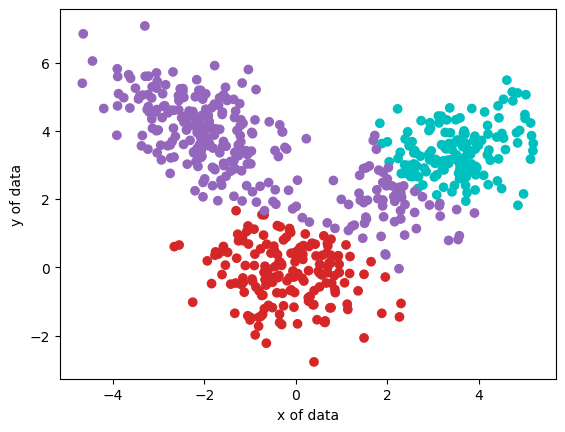

pi
[0.45972408 0.23864431 0.30163161]
mu
[[-0.97924285  3.44580243]
 [ 3.46230901  3.35308698]
 [-0.22638585 -0.02143203]]
sigma
[[[ 4.01623249 -1.96904496]
  [-1.96904496  2.00008913]]

 [[ 0.97272485  0.13571776]
  [ 0.13571776  0.7003245 ]]

 [[ 1.09337263 -0.34039518]
  [-0.34039518  1.22372341]]]


In [422]:
def log_convergence(x,K,R,indices,mu,sigma,pi,error_f,old_log):
    n=x.shape[1]
    d=x.shape[0]
    pi_log=np.log(pi)
    det_log=np.zeros(pi.shape)
    constant=-n*d/2*np.log(2*np.pi)
    constant=0#can be commented
    for k in range(K):
        det_log[k]=np.log(np.abs(np.linalg.det(sigma[k])))
    complete_log=constant
    for i in range(n):
        index=indices[i]
        gaussian_term=(x[:,i]-mu[index])@np.linalg.inv(sigma[index])@(x[:,i]-mu[index])
        complete_log=complete_log-det_log[index]/2+pi_log[index]-1/2*gaussian_term
    return complete_log,(abs(complete_log-old_log)<abs(error_f*old_log))
    
def GMM_EM(x,K,max_iter,ini_method,error,given_mu):
    pi_t,mu_t,sigma_t=GMM_initializer(x,K,ini_method,given_mu)
    n=x.shape[1]
    d=x.shape[0]
    log=0
    for t in range(max_iter):
        Q_t,R_t,indices_t=GMM_e_step(x,K,mu_t,sigma_t,pi_t)
        new_mu,new_sigma,new_pi=GMM_mstep(x,K,mu_t,sigma_t,pi_t,Q_t)
        log,clog=log_convergence(x,K,R_t,indices_t,new_mu,new_sigma,new_pi,error,log)
        if (clog):
            break
        mu_t,sigma_t,pi_t=new_mu,new_sigma,new_pi
    Q_f,R_f,indices_f=GMM_e_step(x,K,mu_t,sigma_t,pi_t)
    print(log)
    return Q_f,R_f,indices_f,mu_t,sigma_t,pi_t


Q_f1,R_f1,indices_f1,mu_t1,sigma_t1,pi_t1=GMM_EM(x1,3,30,0,0.03,None)##
c_list=['#9467bd','c','#d62728']
colors=[]
for i in range(len(indices_f1)):
    colors.append(c_list[indices_f1[i]])
plt.scatter(x1[0],x1[1],c=colors)
plt.xlabel('x of data')
plt.ylabel('y of data')
plt.show()
print('pi')
print(pi_t1)
print('mu')
print(mu_t1)
print('sigma')
print(sigma_t1)

In the previous cell, we used the default initialization method for image 1.<br>
Note that the clustering is rather good, but it is a little different from our expectations. We alse see that the covariance martix of the first (purple) distribution reflects the oval shape of purple datapoints.

-1214.9729779547924


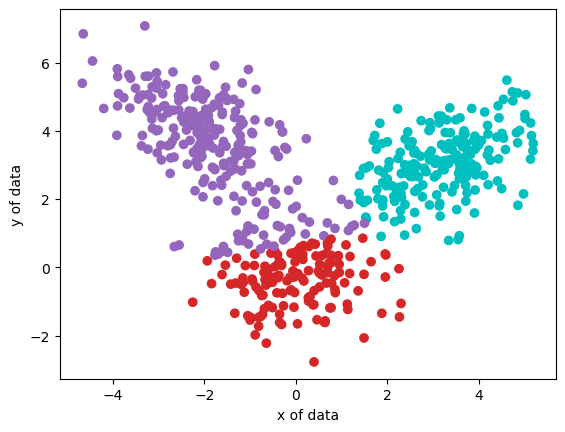

pi
[0.44454989 0.30853613 0.24691398]
mu
[[-1.63698123  3.42117915]
 [ 3.28087371  3.08665193]
 [ 0.09414403 -0.38628657]]
sigma
[[[ 1.68768761 -1.17295209]
  [-1.17295209  2.27689563]]

 [[ 0.8241486   0.34637442]
  [ 0.34637442  0.85417002]]

 [[ 0.83526047  0.13743073]
  [ 0.13743073  0.57590867]]]


In [424]:
Q_f1,R_f1,indices_f1,mu_t1,sigma_t1,pi_t1=GMM_EM(x1,3,30,1,0.03,None)##

c_list=['#9467bd','c','#d62728']
colors=[]
for i in range(len(indices_f1)):
    colors.append(c_list[indices_f1[i]])
plt.scatter(x1[0],x1[1],c=colors)
plt.xlabel('x of data')
plt.ylabel('y of data')
plt.show()
print('pi')
print(pi_t1)
print('mu')
print(mu_t1)
print('sigma')
print(sigma_t1)

This time, we used the farthest point method for image 1.<br>
Note that while the clustering is not perfect, it is closer to what we expect, even though the log likelihood is higher than the previous method. The pi coeeficient numbers are also in a good range.

-1143.8962237483113


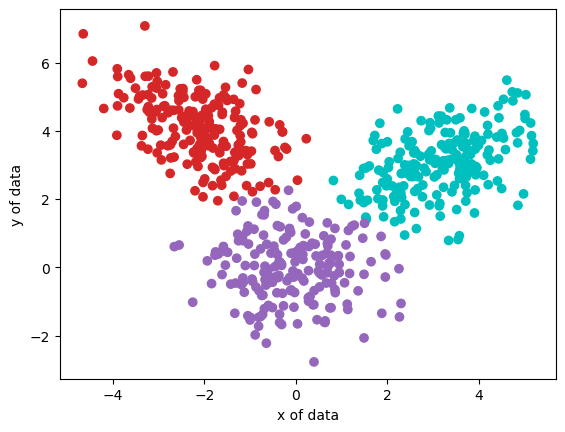

pi
[0.34040938 0.3283477  0.33124292]
mu
[[-0.077169    0.03676902]
 [ 3.16848069  3.04740025]
 [-2.13227375  4.12001418]]
sigma
[[[ 0.94526409 -0.02286084]
  [-0.02286084  1.00052356]]

 [[ 0.98025552  0.39760807]
  [ 0.39760807  0.86930898]]

 [[ 0.83711475 -0.41357608]
  [-0.41357608  0.90305631]]]


In [410]:
given_mu1=[[],[],[]]
for i in range(K):
    given_mu1[i]=np.mean(x1[:,i*200:(i+1)*200],axis=1)

Q_f1,R_f1,indices_f1,mu_t1,sigma_t1,pi_t1=GMM_EM(x1,3,30,2,0.03,given_mu1)

c_list=['#9467bd','c','#d62728']
colors=[]
for i in range(len(indices_f1)):
    colors.append(c_list[indices_f1[i]])
plt.scatter(x1[0],x1[1],c=colors)
plt.xlabel('x of data')
plt.ylabel('y of data')
plt.show()
print('pi')
print(pi_t1)
print('mu')
print(mu_t1)
print('sigma')
print(sigma_t1)

At last, we used the informed guess method for image 1. For our informed guess, we assumed to know which distribution each data originally belongs to and used those values<br>
This time the clustering is closer to expectations but the log likelihood is even higher. 

## Simulations for image 2

-921.5756071011406


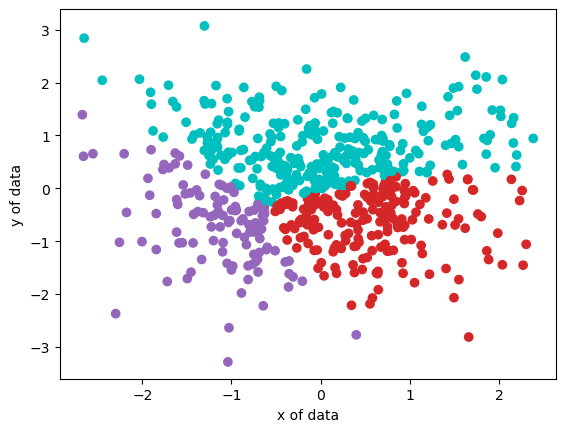

pi
[0.20447727 0.41511967 0.38040306]
mu
[[-0.899065   -0.45109417]
 [ 0.07201232  0.43715306]
 [ 0.33754987 -0.11755099]]
sigma
[[[ 0.5480969  -0.18314412]
  [-0.18314412  0.91049046]]

 [[ 0.87269192 -0.08560188]
  [-0.08560188  0.75178116]]

 [[ 0.74204564 -0.06137574]
  [-0.06137574  0.80299312]]]


In [425]:
Q_f2,R_f2,indices_f2,mu_t2,sigma_t2,pi_t2=GMM_EM(x2,3,30,0,0.03,None)##
c_list=['#9467bd','c','#d62728']
colors=[]
for i in range(len(indices_f2)):
    colors.append(c_list[indices_f2[i]])
plt.scatter(x2[0],x2[1],c=colors)
plt.xlabel('x of data')
plt.ylabel('y of data')
plt.show()
print('pi')
print(pi_t2)
print('mu')
print(mu_t2)
print('sigma')
print(sigma_t2)

First, we use the default initialization method for image 2.<br>
We see that while it has given a good log likelihood result, the color distrubution is far from what we expect. according to the pi values, the algorithm has converged to three (not exactly) equal clusters. But we expected it to converge to a single distribution.<br>
The sigma values also have small off-diagonal values.

-619.8178487026993


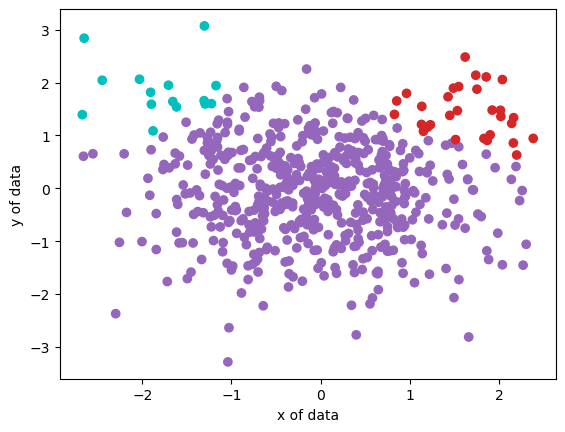

pi
[0.84017849 0.05333544 0.10648607]
mu
[[-0.05452742 -0.18064595]
 [-1.50751982  1.38553873]
 [ 0.94545109  1.14937184]]
sigma
[[[ 0.76932367 -0.03209643]
  [-0.03209643  0.71111181]]

 [[ 0.41122579 -0.01588869]
  [-0.01588869  0.43230895]]

 [[ 0.75317966 -0.00190854]
  [-0.00190854  0.36541235]]]


In [428]:
Q_f2,R_f2,indices_f2,mu_t2,sigma_t2,pi_t2=GMM_EM(x2,3,40,1,0.03,None)##
c_list=['#9467bd','c','#d62728']
colors=[]
for i in range(len(indices_f2)):
    colors.append(c_list[indices_f2[i]])
plt.scatter(x2[0],x2[1],c=colors)
plt.xlabel('x of data')
plt.ylabel('y of data')
plt.show()
print('pi')
print(pi_t2)
print('mu')
print(mu_t2)
print('sigma')
print(sigma_t2)

Next, we used the farthest point method for image 2.<br>
The log likelihood is higher in this case, but we can see both from the pi numbers (0.84 for the first dist.) and the scatterplot, that this result is near to what we expected visually. There is effectively only one clusterm and the other two are negligilbe.<br>
The sigmas still have small off-diagonal values.

-1152.604457220923


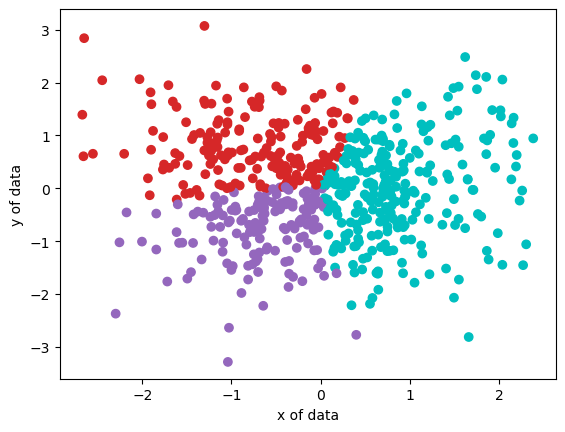

pi
[0.33338076 0.33327832 0.33334092]
mu
[[-0.09826115  0.00760307]
 [ 0.13087193  0.01617833]
 [-0.10919159  0.10976441]]
sigma
[[[ 0.94526801 -0.02145539]
  [-0.02145539  0.9313015 ]]

 [[ 0.95355096  0.01679769]
  [ 0.01679769  0.92336995]]

 [[ 0.96467705 -0.0310067 ]
  [-0.0310067   0.92268965]]]


In [427]:
given_mu2=[[],[],[]]
for i in range(K):
    given_mu2[i]=np.mean(x2[:,i*200:(i+1)*200],axis=1)

Q_f2,R_f2,indices_f2,mu_t2,sigma_t2,pi_t2=GMM_EM(x2,3,30,2,0.03,given_mu2)

c_list=['#9467bd','c','#d62728']
colors=[]
for i in range(len(indices_f2)):
    colors.append(c_list[indices_f2[i]])
plt.scatter(x2[0],x2[1],c=colors)
plt.xlabel('x of data')
plt.ylabel('y of data')
plt.show()
print('pi')
print(pi_t2)
print('mu')
print(mu_t2)
print('sigma')
print(sigma_t2)

Finally, we use the informed guess method for image 2.<br>
The log likelihood is the lowest, but visually there is nothing inherently different from the first simulation of image 2 (random selection of K points as centers). We still get low off-diagonal values in sigma matrices

## Conclusion

As seen in simulating image 1, we rank algorithms based on log likelihood as follows:
1: random K_number selection 2: Farthest point method 3: Informed guess.<br>
visually-based ranking:<br>
1: Informed guess 2: Farthest point method 3: random K_number selection

For image 2, we rank algorithms based on log likelihood as follows:
1: Informed guess 2: random K_number selection 3: Farthest point method.<br>
visually-based ranking:<br>
1: Farthest point method  2&3: Informed guess-random K_number selection 

We conclude that the Farthest point method is the best of all, so we base our conclusion on its results.

In image 1, there are three different clusters, and the final coefficients are close and there is no main distibution. The mean of each one is close to what we see visually.

In image 2, there was only 1 distribution from the start, so in the end only one pi coefficient is large and the others are small. The mean associated with it is close to the total dataset mean.